In [334]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import pickle
import gzip
from matplotlib import rc
import warnings

Simulation af Sine Circle Map

In [524]:
def simulating_sine_circle_map(theta_start, antal_iterationer, Omega, A_ext):
    T_int = 8
    T_ext = Omega * T_int
    
    theta = [theta_start]
    iterationer = np.arange(antal_iterationer + 1)

    for i in range(antal_iterationer):
        theta_next = theta[i] - A_ext*np.sin(theta[i]) + 2*np.pi * Omega
        theta.append(theta_next)

    return np.array(iterationer), np.array(theta)

In [556]:
sim = simulating_sine_circle_map(0, 100, 0.01, 5)
sim2 = simulating_sine_circle_map(1, 150, 0.6, 0.9)
sim3 = simulating_sine_circle_map(1, 200, 0.6, 0.9)

print(sim[1][-1]/(2*np.pi)/100, sim2[1][-1]/2*np.pi/1500, sim3[1][-1]/2*np.pi/2000)
len(sim[1])

0.054977976335393544 0.6004245587267257 0.5998379845108108


101

Checking entrainment:

In [530]:
def entrainment_sine(omega_list, coupling_list):
    sine_map_dict = {"Omega": [], "coupling_strength": [], "entrainment_value": [], "exception": []}
    A_int = 4
    A_ext_list = coupling_list * A_int

    for i in tqdm(range(len(omega_list)), desc="Processing"):
        for j in range(len(A_ext_list)):
            antal_iterationer = 400 #svarer til antallet af peaks
            theta_start = 0
            simulation_sine = simulating_sine_circle_map(theta_start, antal_iterationer, omega_list[i], A_ext_list[j])
            sim_iterationer, sim_theta = simulation_sine[0], simulation_sine[1]

            rotation_number = 0
            exception = False
            
            try:
                rotation_number = sim_theta[-1] / (2*np.pi ) / (antal_iterationer) # Redegør for, hvorfor det er antal_sim * 10
            except:
                exception = True
            
            sine_map_dict["Omega"].append(omega_list[i])
            sine_map_dict["coupling_strength"].append(coupling_list[j])
            sine_map_dict["entrainment_value"].append(rotation_number)
            sine_map_dict["exception"].append(exception)
        
    return sine_map_dict

In [539]:
# Startbetingelser for den interne oscillator findes pt. inden i definitionerne

antal_omega = 600
antal_coupling = 600

# Der laves gridsearch på disse omega og coupling
omega_list = np.linspace(0,3,antal_omega)
coupling_list = np.linspace(0,5,antal_coupling)

entrainment_sim = entrainment_sine(omega_list, coupling_list)

Processing:   0%|          | 0/600 [00:00<?, ?it/s]

Processing: 100%|██████████| 600/600 [03:48<00:00,  2.62it/s]


Plotting:

In [542]:
Omegas_tested = entrainment_sim["Omega"]
Coupling_strengths_tested = entrainment_sim["coupling_strength"]
Entrainments = np.array(entrainment_sim["entrainment_value"])
Exceptions = entrainment_sim["exception"]

threshold = 0.005
tunger = [0, 0.5, 1, 1.5, 2, 2.5, 3]
tunger_v2 = np.linspace(0.1,3,30)

colors = ['C0', 'C1', 'C2', 'C6', 'C7', 'C8', 'C9']
colors_v2 = ["red", "orange", "blue", "magenta", "green", "cyan", "darkviolet"]

def get_color_map(Entrainments, tunger, threshold, colors):
    color_map = []

    for entrainment in tqdm(Entrainments, "Processing"):
        # Initialize the color to white (default color)
        color = 'white'

        # Check if entrainment falls within any of the specified ranges
        for i, start in enumerate(tunger_v2):
            if start - threshold <= entrainment <= start + threshold:
                color = 'grey'
                break  # Break out of the loop once a matching range is found

        # Check if entrainment falls within any of the specified ranges
        for i, start in enumerate(tunger):
            if start - threshold <= entrainment <= start + threshold:
                color = colors_v2[i]
                break  # Break out of the loop once a matching range is found

        color_map.append(color)

    return color_map

color_map = get_color_map(Entrainments, tunger, threshold, colors)

Processing:   2%|▏         | 7519/360000 [00:00<00:10, 34166.84it/s]

Processing: 100%|██████████| 360000/360000 [00:04<00:00, 74574.91it/s] 


Processing: 0it [00:00, ?it/s]


Text(0.5, 0, 'External / Internal Period')

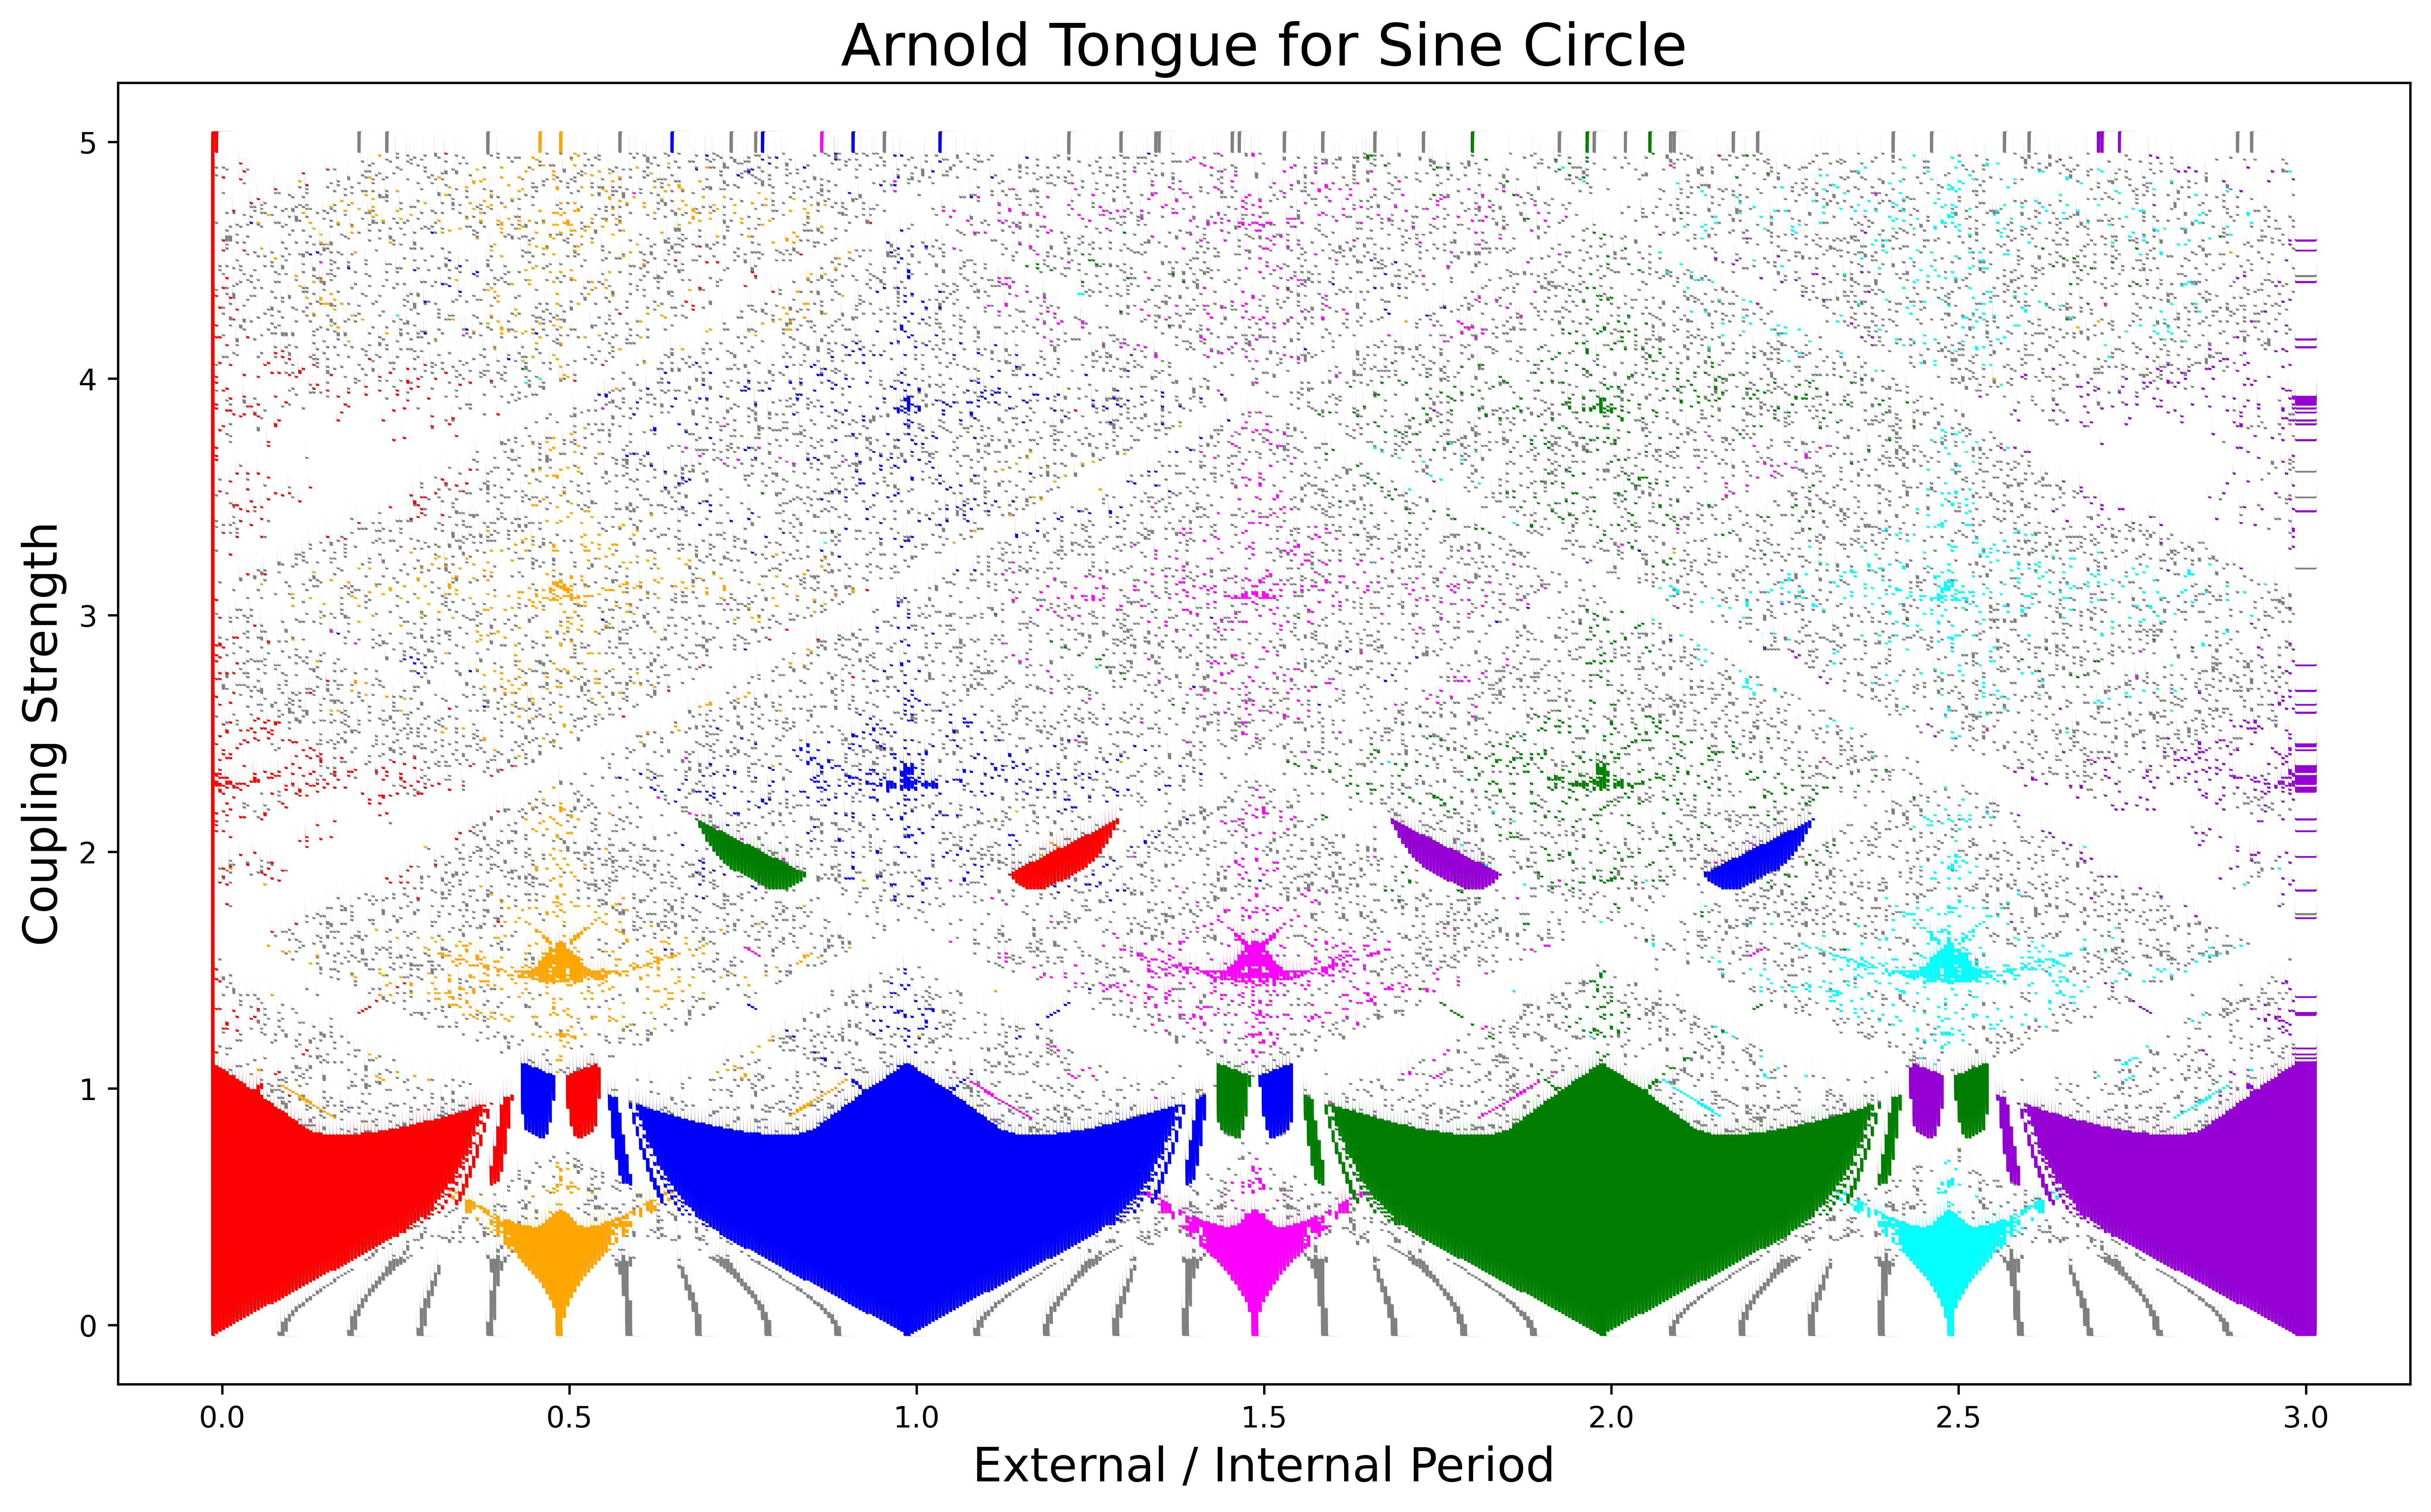

In [543]:
plt.figure(figsize=(14,8), dpi=600)

tqdm(plt.scatter(Omegas_tested, Coupling_strengths_tested, c=color_map, s=40, marker="s"), "Processing")

plt.title("Arnold Tongue for Sine Circle", fontsize=20)
plt.ylabel("Coupling Strength", fontsize=16)
plt.xlabel("External / Internal Period", fontsize=16)

Skævhed til venstre, hvor kommer det fra?!

In [297]:
første_sim = simulating_sine_circle_map(4, 1000, 1, 3)

In [298]:
første_sim[1][-1]

6290.964274054988

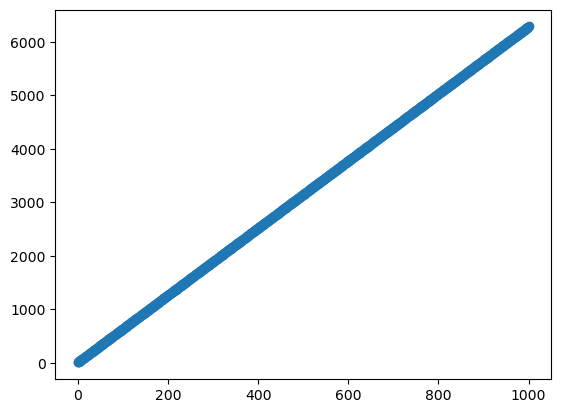

In [299]:
plt.scatter(første_sim[0], første_sim[1])

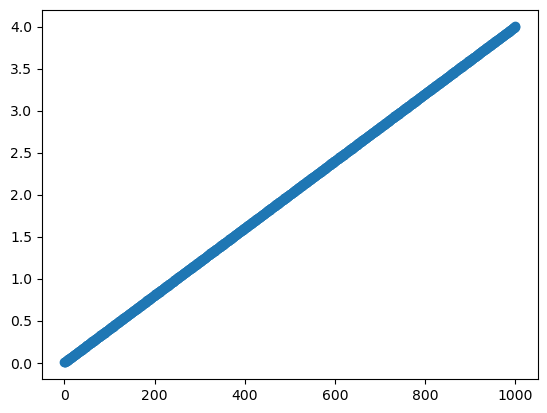

In [300]:
rotation = (første_sim[1] / np.pi*2) / len(første_sim[1])
dummy = np.arange(len(rotation))
plt.scatter(dummy, rotation)

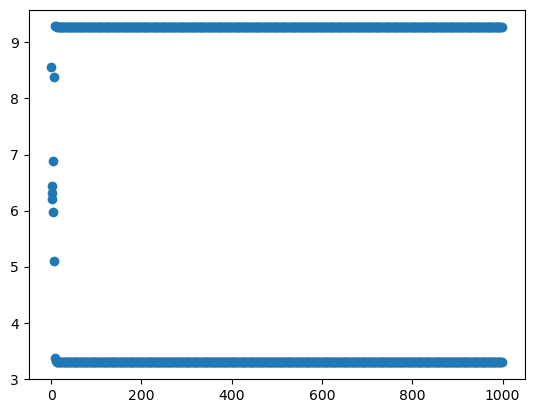

In [107]:
plt.scatter(np.arange(len(np.diff(første_sim[1]))),np.diff(første_sim[1]))

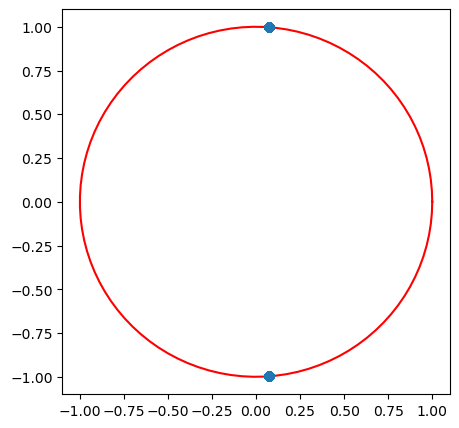

In [109]:
plt.figure(figsize=(5,5))
plt.scatter(np.cos(første_sim[1][200:1000]),np.sin(første_sim[1][200:1000]), zorder=3)

dummy_vinkel = np.linspace(0,2*np.pi,100)
xdummy = np.cos(dummy_vinkel)
ydummy = np.sin(dummy_vinkel)

plt.plot(xdummy, ydummy, color="red")